<a href="https://colab.research.google.com/github/nitrogenlab/GP15_watermassanalysis/blob/main/ThermoclineEndMemberDefinition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gsw

     |████████████████████████████████| 2.4 MB 6.5 MB/s 


In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1E9XGag2_uC2TM_5DcOcmSz86I1xj6hHr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1E9XGag2_uC2TM_5DcOcmSz86I1xj6hHr" -O GLODAPv2.2019_Pacific_Ocean.csv && rm -rf /tmp/cookies.txt

--2021-09-13 01:59:12--  https://docs.google.com/uc?export=download&confirm=oSvy&id=1E9XGag2_uC2TM_5DcOcmSz86I1xj6hHr
Resolving docs.google.com (docs.google.com)... 142.250.141.113, 142.250.141.138, 142.250.141.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-6c-docs.googleusercontent.com/docs/securesc/l4ugi2pbci5de6vod9ics97o06njk6l9/o13e0f2rkevd9eh2sqfjvp03dvrgllmo/1631498325000/06203730782251856755/17932746007061921320Z/1E9XGag2_uC2TM_5DcOcmSz86I1xj6hHr?e=download [following]
--2021-09-13 01:59:12--  https://doc-0c-6c-docs.googleusercontent.com/docs/securesc/l4ugi2pbci5de6vod9ics97o06njk6l9/o13e0f2rkevd9eh2sqfjvp03dvrgllmo/1631498325000/06203730782251856755/17932746007061921320Z/1E9XGag2_uC2TM_5DcOcmSz86I1xj6hHr?e=download
Resolving doc-0c-6c-docs.googleusercontent.com (doc-0c-6c-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connec

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pandas
import gsw

Read in the data frame and pick a subset of columns

In [6]:
colnames_subset = ["latitude", 'longitude', 'year', 'depth',
                   'pressure', 'temperature','salinity','oxygen',
                   'silicate', 'nitrate', 'phosphate', 'sigma0']


df = pandas.read_csv("GLODAPv2.2019_Pacific_Ocean.csv",
                     na_values = -9999)[colnames_subset]

df['NO'] = df['oxygen'] + (df['nitrate']*9.68)
df['PO'] = df['oxygen'] + (df['phosphate']*155)
df['potential_temp'] = gsw.pt_from_t(df['salinity'],
                                df['temperature'],
                                df['pressure'],
                                df['sigma0'])
df["absolute_salinity"] = gsw.SA_from_SP(
    SP=df["salinity"], p=df["pressure"],
    lon=df["longitude"], lat=df["latitude"])
df["conservative_temp"] = gsw.CT_from_t(SA=df["absolute_salinity"],
                                  t=df["temperature"],
                                  p=df["pressure"])
df["sigma2"] = gsw.sigma2(SA=df["absolute_salinity"],CT=df["conservative_temp"])
df["sigma4"] = gsw.sigma4(SA=df["absolute_salinity"],CT=df["conservative_temp"])

[23.9  23.91 23.92 23.93 23.94 23.95 23.96 23.97 23.98 23.99]
initial estimate of standard deviation of y[i] is: 0.5544740593216457
s 923.7537828298617
With s= 923.7537828298617 negmse is -1.6046476178714388
s 461.87689141493087
With s= 461.87689141493087 negmse is -12815138.140990969
This is no better than best_neg_mse of -1.6046476178714388
New lowerbound_s is 461.87689141493087
s 1847.5075656597235
With s= 1847.5075656597235 negmse is -1.6046476178714388
This is no better than best_neg_mse of -1.6046476178714388
New upperbound_s is 1847.5075656597235
s 1154.692228537327
With s= 1154.692228537327 negmse is -1.6046476178714388
This is no better than best_neg_mse of -1.6046476178714388
New upperbound_s is 1154.692228537327
s 808.284559976129
With s= 808.284559976129 negmse is -1.6046476178714388
This is no better than best_neg_mse of -1.6046476178714388
New lowerbound_s is 808.284559976129
s 981.488394256728
With s= 981.488394256728 negmse is -1.6046476178714388
This is no better than 

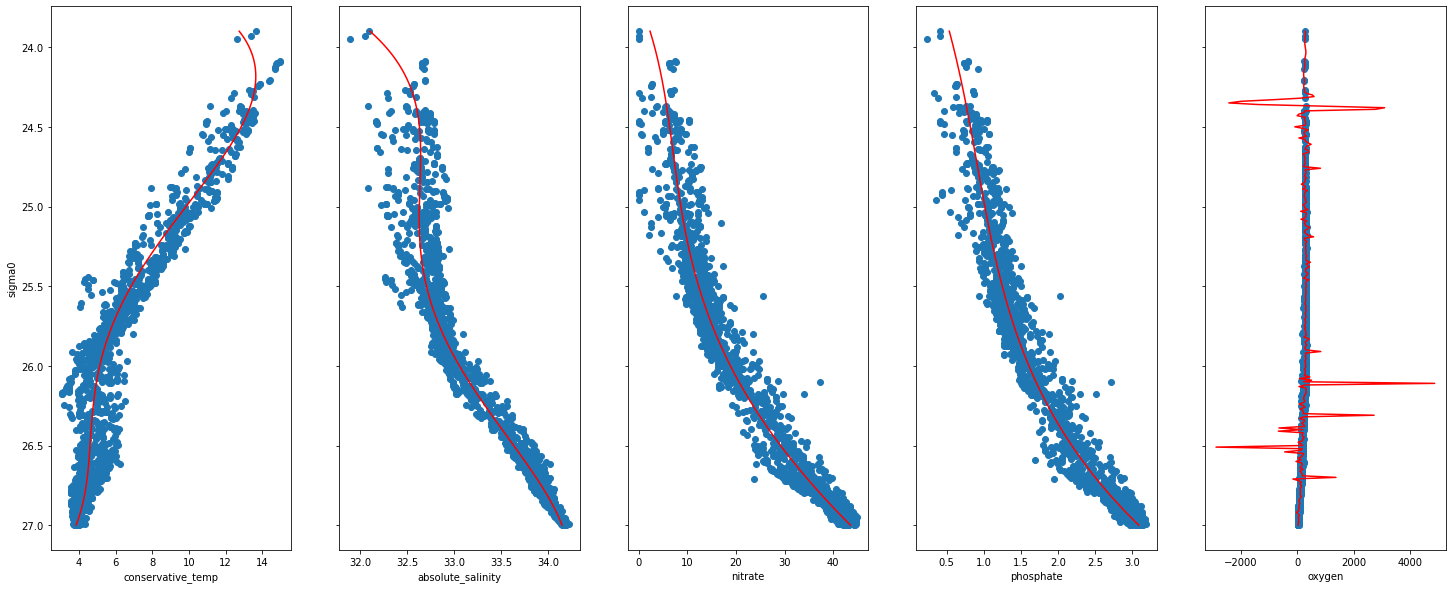

[21.91 21.92 21.93 21.94 21.95 21.96 21.97 21.98 21.99 22.  ]
initial estimate of standard deviation of y[i] is: 0.5011161905561287
s 1203.6810897158211
With s= 1203.6810897158211 negmse is -0.5162464964613882
s 601.8405448579106
With s= 601.8405448579106 negmse is -9872530041.730196
This is no better than best_neg_mse of -0.5162464964613882
New lowerbound_s is 601.8405448579106
s 2407.3621794316423
With s= 2407.3621794316423 negmse is -0.5162464964613882
This is no better than best_neg_mse of -0.5162464964613882
New upperbound_s is 2407.3621794316423
s 1504.6013621447764
With s= 1504.6013621447764 negmse is -0.5162464964613882
This is no better than best_neg_mse of -0.5162464964613882
New upperbound_s is 1504.6013621447764
s 1053.2209535013435
With s= 1053.2209535013435 negmse is -0.5162464964613882
This is no better than best_neg_mse of -0.5162464964613882
New lowerbound_s is 1053.2209535013435
s 1278.91115782306
With s= 1278.91115782306 negmse is -0.5162464964613882
This is no bette

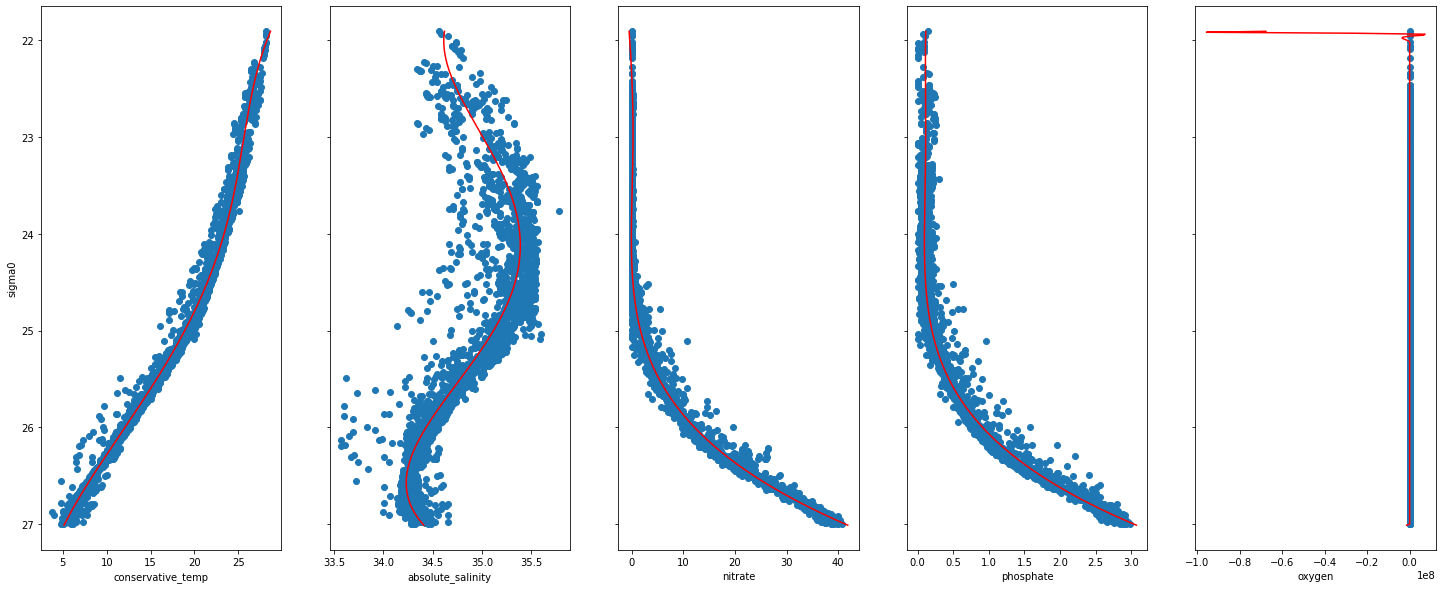

[21.01 21.02 21.03 21.04 21.05 21.06 21.07 21.08 21.09 21.1 ]
initial estimate of standard deviation of y[i] is: 0.15726521642838207
s 63.692412653494735
With s= 63.692412653494735 negmse is -525.9391030881817
s 31.846206326747367
With s= 31.846206326747367 negmse is -525.9453981447961
This is no better than best_neg_mse of -525.9391030881817
New lowerbound_s is 31.846206326747367
s 127.38482530698947
With s= 127.38482530698947 negmse is -525.9391030881817
This is no better than best_neg_mse of -525.9391030881817
New upperbound_s is 127.38482530698947
s 79.61551581686842
With s= 79.61551581686842 negmse is -525.9391030881817
This is no better than best_neg_mse of -525.9391030881817
New upperbound_s is 79.61551581686842
s 55.730861071807894
With s= 55.730861071807894 negmse is -525.9391030881817
This is no better than best_neg_mse of -525.9391030881817
New lowerbound_s is 55.730861071807894
s 67.67318844433817
With s= 67.67318844433817 negmse is -525.9391030881817
This is no better than

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


With s= 5284.941185896414 negmse is -4.800844073816162e+20
This is better than best_neg_mse of -4.8018755927725625e+20
New lowerbound_s is 2642.470592948207
s 10569.882371792828
With s= 10569.882371792828 negmse is -4.059255205526324e+20
This is better than best_neg_mse of -4.800844073816162e+20
New lowerbound_s is 5284.941185896414
s 21139.764743585656
With s= 21139.764743585656 negmse is -2.3480949438672635e+21
This is no better than best_neg_mse of -4.059255205526324e+20
New upperbound_s is 21139.764743585656
s 13212.352964741036
With s= 13212.352964741036 negmse is -3.9783436694405736e+20
This is better than best_neg_mse of -4.059255205526324e+20
New lowerbound_s is 10569.882371792828
s 15854.823557689242
With s= 15854.823557689242 negmse is -4.226334464908273e+20
This is no better than best_neg_mse of -3.9783436694405736e+20
New upperbound_s is 15854.823557689242
s 13212.352964741036
With s= 13212.352964741036 negmse is -3.9783436694405736e+20
This is no better than best_neg_mse o

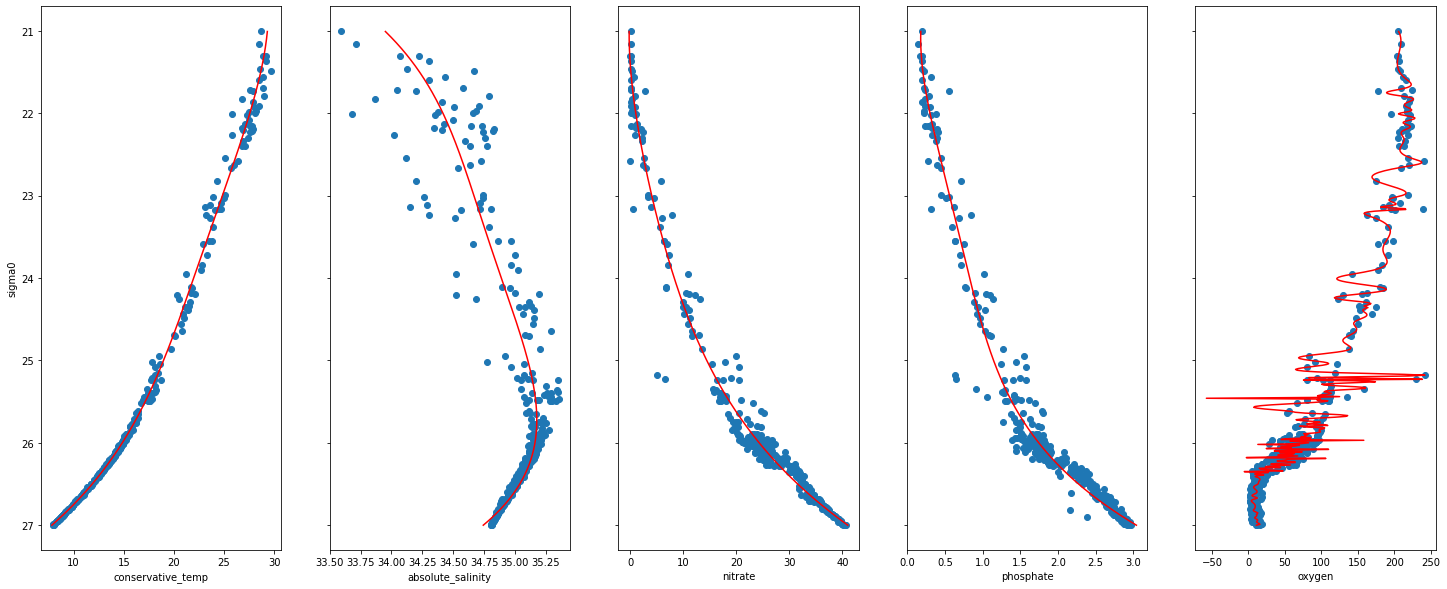

[23.9  23.91 23.92 23.93 23.94 23.95 23.96 23.97 23.98 23.99]
initial estimate of standard deviation of y[i] is: 0.5544740593216457
s 923.7537828298617
With s= 923.7537828298617 negmse is -1.6046476178714388
s 461.87689141493087
With s= 461.87689141493087 negmse is -12815138.140990969
This is no better than best_neg_mse of -1.6046476178714388
New lowerbound_s is 461.87689141493087
s 1847.5075656597235
With s= 1847.5075656597235 negmse is -1.6046476178714388
This is no better than best_neg_mse of -1.6046476178714388
New upperbound_s is 1847.5075656597235
s 1154.692228537327
With s= 1154.692228537327 negmse is -1.6046476178714388
This is no better than best_neg_mse of -1.6046476178714388
New upperbound_s is 1154.692228537327
s 808.284559976129
With s= 808.284559976129 negmse is -1.6046476178714388
This is no better than best_neg_mse of -1.6046476178714388
New lowerbound_s is 808.284559976129
s 981.488394256728
With s= 981.488394256728 negmse is -1.6046476178714388
This is no better than 

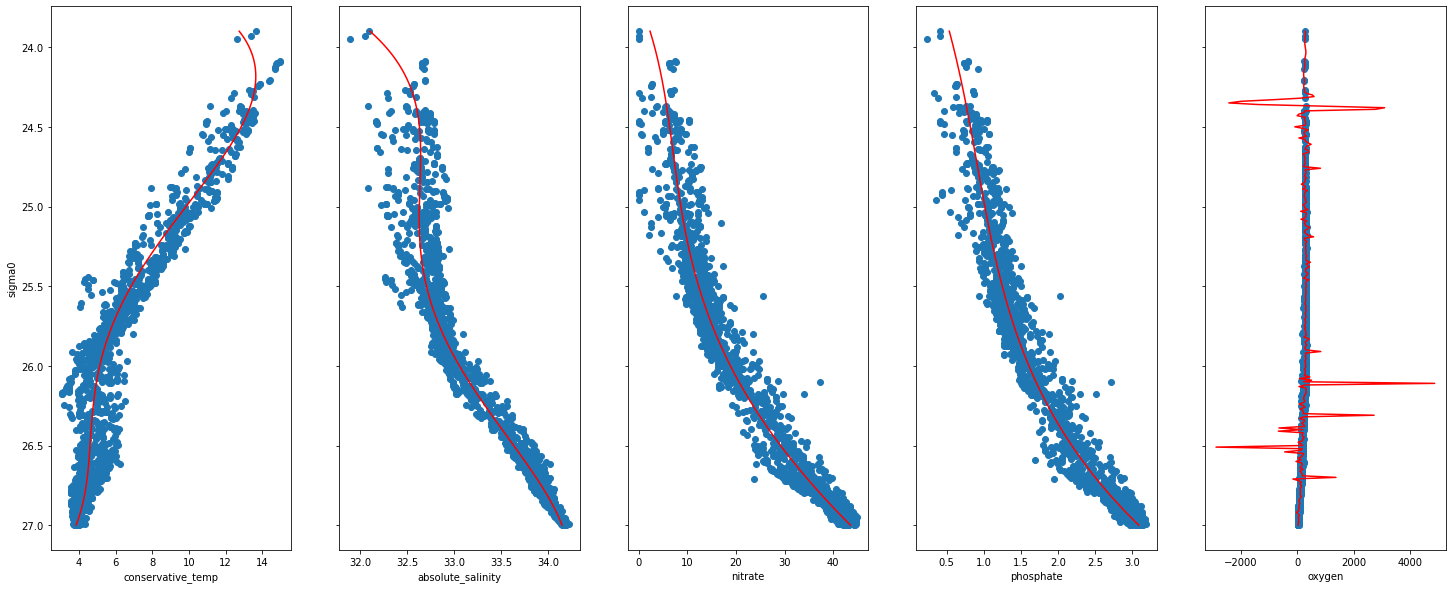

In [30]:
import scipy
import scipy.interpolate
import sklearn
import sklearn.model_selection
import numpy as np
from collections import OrderedDict, defaultdict
from matplotlib import pyplot as plt

STEP_SIZE = 0.01
FEATURES_TO_INTERPOLATE = ["conservative_temp", "absolute_salinity",
                           "nitrate", "phosphate", "oxygen"]


class UnivariateSplineEstimator(object):

    def __init__(self, k, s):
        self.k=k
        self.s=s

    def fit(self, data, targets):
        self.interpolator = scipy.interpolate.UnivariateSpline(
          x=data, y=targets, w=np.ones(len(data)), k=self.k, s=self.s)
    
    def predict(self, data):
        return self.interpolator(data)
    
    def get_params(self, deep=True):
        return {'k': self.k, 's':self.s}


def get_interpolation(x,y,k,intervals):
  #Use a binary search & cross-validation technique to find a good value for s
  #Get CV splits for x

  #let's try to get an estimate for the variance of y[i]. Separate into bins
  # equal to 1/1000 of the range, then compute variance for each bin.
  minx = np.min(x)
  x_bin_size = (np.max(x) - minx)/100.0
  binstart_to_ys = defaultdict(list)
  for (this_x, this_y) in zip(x,y):
    binstart = minx + int((this_x - minx)/x_bin_size)
    binstart_to_ys[binstart].append(this_y)
  stdy = np.mean([np.std(ys_in_bin) for ys_in_bin in binstart_to_ys.values()])
  print("initial estimate of standard deviation of y[i] is:",stdy)

  

  def get_cv_score(s):
      print("s",s)
      return np.mean(sklearn.model_selection.cross_validate(
          estimator=UnivariateSplineEstimator(k=k, s=s),
          X=x, y=y, scoring="neg_mean_squared_error", cv=5)['test_score'])

  s_to_try = stdy*len(x) #likely an overestimate
  #initialize
  best_neg_mse = get_cv_score(s_to_try)
  best_s = s_to_try
  print("With s=",s_to_try,"negmse is",best_neg_mse)
  upperbound_s = np.inf
  lowerbound_s = 0

  iternum=0
  while True:
      iternum += 1
      if (lowerbound_s == 0):
          s_to_try = best_s/2.0
      elif (upperbound_s == np.inf):
          s_to_try = best_s*2
      else:
          s_to_try = 0.5*(upperbound_s + lowerbound_s)

      neg_mse = get_cv_score(s_to_try)
      print("With s=",s_to_try,"negmse is",neg_mse)
      
      #if the neg_mse is worse, use this to tighten the bounds for the binary
      # search
      if (neg_mse <= best_neg_mse):
          print("This is no better than best_neg_mse of",best_neg_mse)
          if (s_to_try >= best_s):
              upperbound_s = s_to_try
              print("New upperbound_s is", upperbound_s)
          else:
              lowerbound_s = s_to_try
              print("New lowerbound_s is", lowerbound_s)
      else:
          print("This is better than best_neg_mse of",best_neg_mse)
          if (s_to_try >= best_s):
              lowerbound_s = best_s
              print("New lowerbound_s is", lowerbound_s)
          if (s_to_try < best_s):
              upperbound_s = best_s
              print("New upperbound_s is", upperbound_s)
          best_s = s_to_try
          best_neg_mse = neg_mse

      if (np.abs(upperbound_s - lowerbound_s) < stdy):
          print("breaking")
          best_estimator = UnivariateSplineEstimator(k=k, s=best_s)
          best_estimator.fit(data=x, targets=y)
          break
      if iternum==100:
          assert False

  return best_estimator.predict(intervals)


def get_avg_y_per_x(x,y):
  #deduplication
  x_to_ys = defaultdict(list)
  for an_x, a_y in zip(x, y):
    x_to_ys[an_x].append(a_y)

  ys = []
  xs = []
  for x in sorted(x_to_ys.keys()):
    xs.append(x)
    ys.append(np.median(x_to_ys[x]))
  
  return np.array(xs), np.array(ys)


def filter_df_for_range_and_interpolate(watertype_name, big_df,
                                        k,
                                        depth_min=-np.inf, depth_max=np.inf,
                                        lat_min=-np.inf, lat_max=np.inf,
                                        lon_min=-np.inf, lon_max=np.inf,
                                        sig0_min=-np.inf, sig0_max=np.inf, ):
  filtered_df = df[(df['latitude'] >= lat_min) & (df['latitude'] <= lat_max)
     & (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max)
     & (df['sigma0'] >= sig0_min) & (df['sigma0'] <= sig0_max)
     & (df['depth'] >= depth_min) & (df['depth'] <= depth_max) ]
  
  orig_x = np.array(filtered_df['sigma0'])
  
  x_min = int(np.ceil(min(orig_x)/STEP_SIZE))*STEP_SIZE
  x_max = int(max(orig_x)/STEP_SIZE)*STEP_SIZE
  intervals = np.array([x_min+(step*STEP_SIZE) for step in 
                       range(int((x_max-x_min)/STEP_SIZE) + 2)])
  print(intervals[:10])

  interpolated_feature_dict = OrderedDict()
  interpolated_feature_dict["sigma0"] = intervals

  fig, ax = plt.subplots(nrows=1, ncols=len(FEATURES_TO_INTERPOLATE),
                         sharey=True,
                         figsize=(len(FEATURES_TO_INTERPOLATE)*5, 10))
  for idx,feature_name in enumerate(FEATURES_TO_INTERPOLATE):
    orig_y = np.array(filtered_df[feature_name])
    #filter out nans
    filt_x = orig_x[np.isfinite(orig_y)]
    filt_y = orig_y[np.isfinite(orig_y)]

    x,y = get_avg_y_per_x(x=filt_x,y=filt_y)
    
    interpolated_features = get_interpolation(x=x,
        y=y,
        k=k,
        intervals=intervals)
    
    interpolated_feature_dict[feature_name] = interpolated_features
    plt.sca(ax[idx])
    plt.xlabel(feature_name)
    #plt.scatter(orig_y, orig_x)
    plt.scatter(y, x)
    plt.plot(interpolated_features, intervals, color="red")

  plt.sca(ax[0])
  plt.ylabel("sigma0")
  plt.ylim(plt.ylim()[1], plt.ylim()[0])
  print(watertype_name)
  plt.show()

  pandas.DataFrame(interpolated_feature_dict).to_csv(watertype_name+".csv", index=False)

#big_df refers to the glodap df.
#s controls smoothing of the spline
#k controls the degree of the spline. k=4 is a quartic spline.
# Cubic spline seemed less reliable

filter_df_for_range_and_interpolate(watertype_name="PSUW",
                                    big_df=df, lat_min=50, lat_max=58,
                                    lon_min=-155, lon_max=-140,
                                    sig0_min=21, sig0_max=27,
                                    #s=1000000,
                                    k=4
                                    )

filter_df_for_range_and_interpolate(watertype_name="ENPCW",
                                    big_df=df, lat_min=16, lat_max=26,
                                    lon_min=-170, lon_max=-140,
                                    sig0_min=21, sig0_max=27,
                                    #s=1000000*0.5,
                                    k=4
                                    )

filter_df_for_range_and_interpolate(watertype_name="ESSW",
                                    big_df=df, lat_min=-5, lat_max=5,
                                    lon_min=-90, lon_max=-80,
                                    sig0_min=21, sig0_max=27,
                                    #s=1000000,
                                    k=4
                                    )

filter_df_for_range_and_interpolate(watertype_name="SPCW",
                                    big_df=df, lat_min=50, lat_max=58,
                                    lon_min=-155, lon_max=-140,
                                    sig0_min=21, sig0_max=27,
                                    #s=1000000,
                                    k=4
                                    )
